# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [8]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [9]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

Cloning into 'cv_course_2023'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 189 (delta 67), reused 147 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (189/189), 25.85 MiB | 26.54 MiB/s, done.
Resolving deltas: 100% (67/67), done.


# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [15]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [16]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

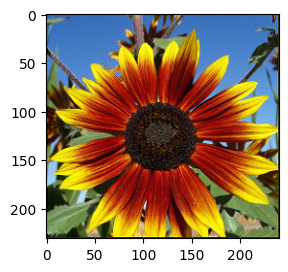

In [17]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

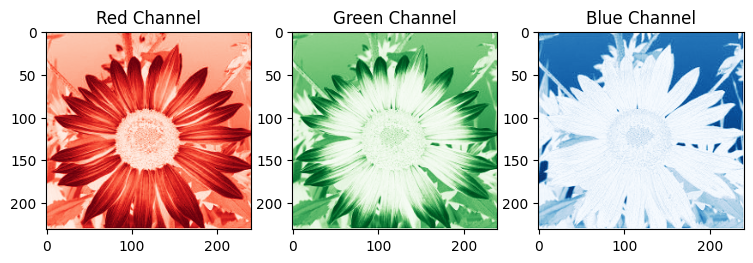

In [18]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [19]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

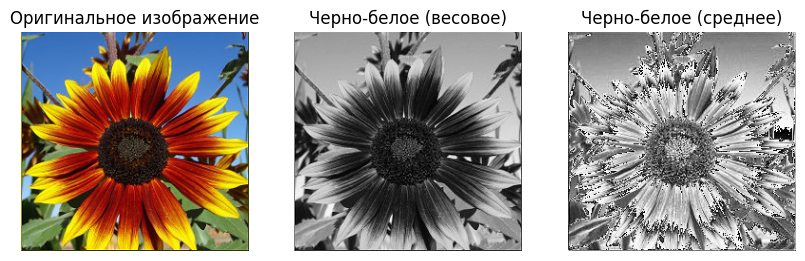

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

R, G, B = cv2.split(img)


gray_weighted = 0.299 * R + 0.587 * G + 0.114 * B
gray_weighted = gray_weighted.astype(np.uint8)


gray_average = (R + G + B) / 3
gray_average = gray_average.astype(np.uint8)


plt.figure(figsize=[10, 10])

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Оригинальное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_weighted, cmap='Greys_r')
plt.title('Черно-белое (весовое)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_average, cmap='Greys_r')
plt.title('Черно-белое (среднее)')
plt.axis('off')

plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:**
Так как человек воспринимает цвета в разном количестве, то для нас простое усреднее выглядит ребристо ибо в жизни мы, например, видим зеленый больше. А еще как я понял есть различные преобразования из RGB в ЧБ

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:**
Мы усредняем в темную сторону если спектр ближе к светлому (r = reverse). Мы так делаем, так как яркого цвета больше в жизни и мы не хотим, чтобы глаза плакали от отсутствия эстетики

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [21]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

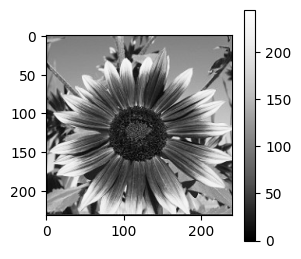

In [22]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [23]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [24]:
def convert_rgb_to_grayscale(img_rgb):
    R, G, B = cv2.split(img)
    # Вычисление по формуле с весами
    gray_weighted = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #gray_weighted = gray_weighted.astype(np.uint64)  # Приведение к целочисленному типу
    return gray_weighted

In [25]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

AssertionError: 

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [26]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

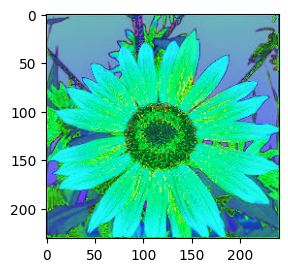

In [27]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

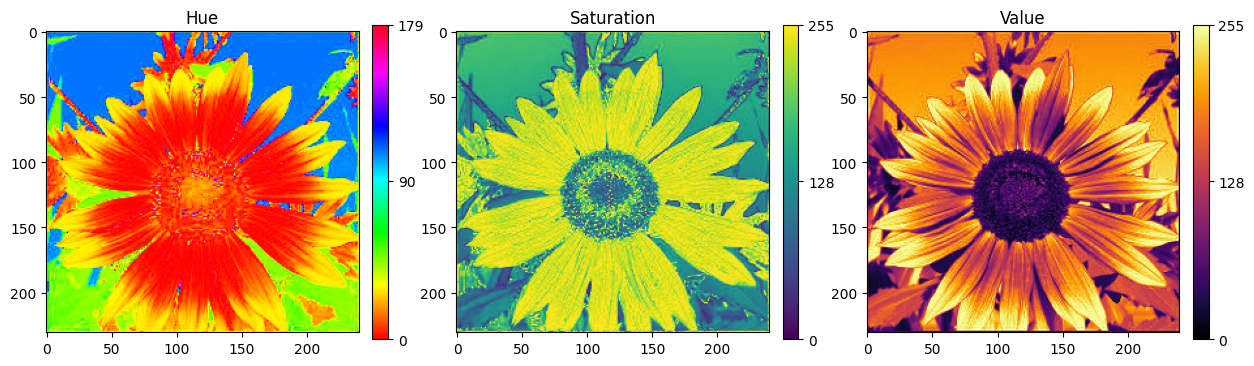

In [28]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

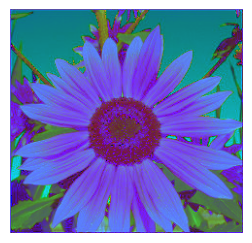

In [31]:
# Преобразование из RGB в HLS
hls_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

# Показываем изображение в HLS
plt.figure(figsize=[3, 3])
plt.imshow(hls_image)
plt.axis('off')
plt.show()


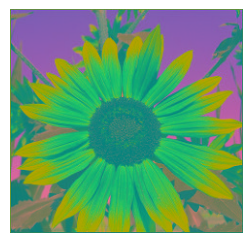

In [32]:
#cv::COLOR_RGB2YUV = 83,
# Преобразование из RGB в YUV
hls_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

# Показываем изображение в YUV
plt.figure(figsize=[3, 3])
plt.imshow(hls_image)
plt.axis('off')
plt.show()

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**
1. Задача хайпового вида: картинки красиввее.
2. https://habr.com/ru/companies/twin3d/articles/581082/ в sRGB лучше рендер 3D
3. посмотреть Hue чтобы понять где пленка засветлилась
4. YCrCb -  яркость для сегментирования

# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v]
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [33]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [34]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [35]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

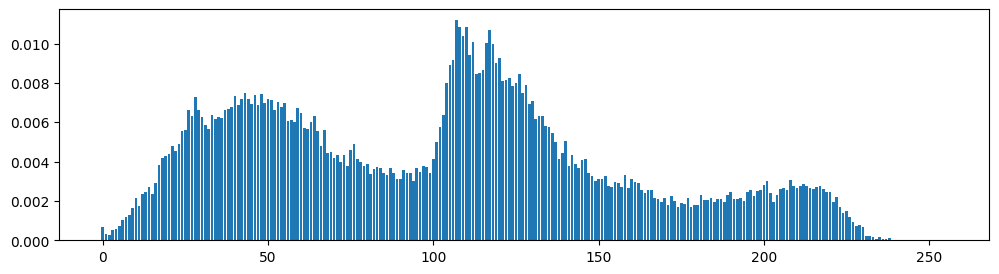

In [36]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [37]:
def compute_hist(img):
    out = np.bincount(img.ravel(),minlength=256)
    return out

In [38]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

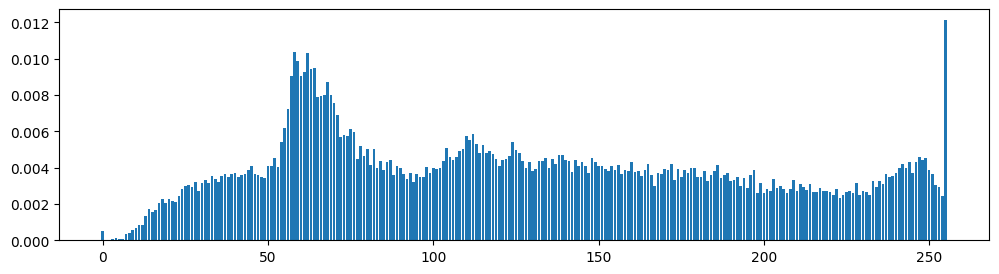

In [39]:
visualize_hist(hist_r)

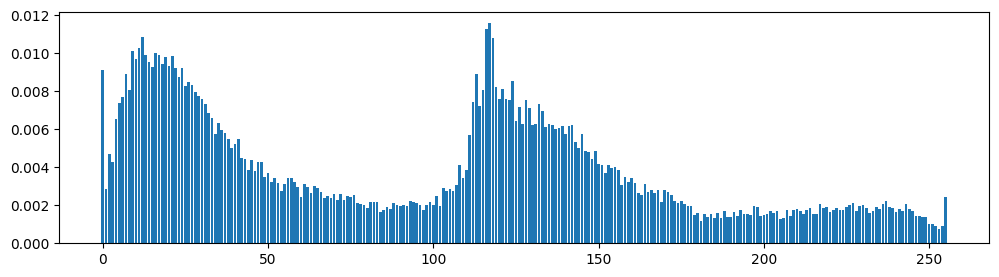

In [40]:
visualize_hist(hist_g)

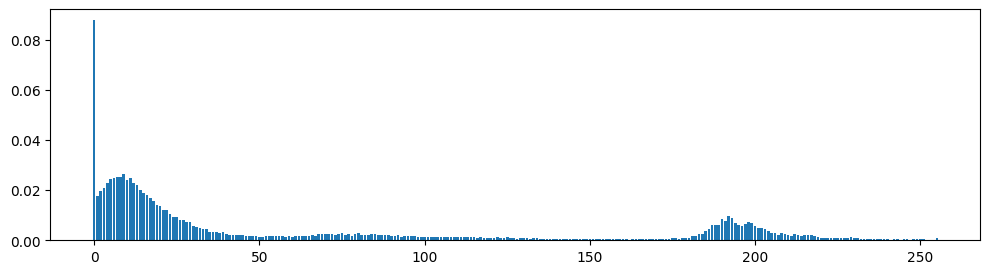

In [41]:
visualize_hist(hist_b)

In [42]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**
конкретно здесь был зеленый,не было синего и картинка не особо яркая(есть что то темное например на картинке)
можно сказать какая интенсивность преобладает => можем судить о качестве картинки, какой насыщенности больше(то есть день, ночь), какого цвета больше, преобладание оттенков. А еще можно эту гистограмму настроить для фотки:

https://photo-master.com/gistogramma-v-fotografii.php?ysclid=m77h19jfyf947685506
При проведении предметной съемки

Предметная съемка на белом фоне может значительно осложнить жизнь фотографу. График тональностей необходим, чтобы избежать так называемого симультанного контраста, когда глаз воспринимает цвет не таким, каким он является в действительности. Например, на мониторе белый часто оказывается серым.


## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:**
вообще я помню мы обсуждали на семинаре, что смена камеры и смена сцены примерно одно и тоже, но в смене сцены, по логике, распределение должно поменяться максимально независимо, а в смене камеры должен быть какой-то переход. В смене освещения интенсивность должна сделать больше бины правые (если свет включили) или сделать больше бины левые если цвет выключили

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

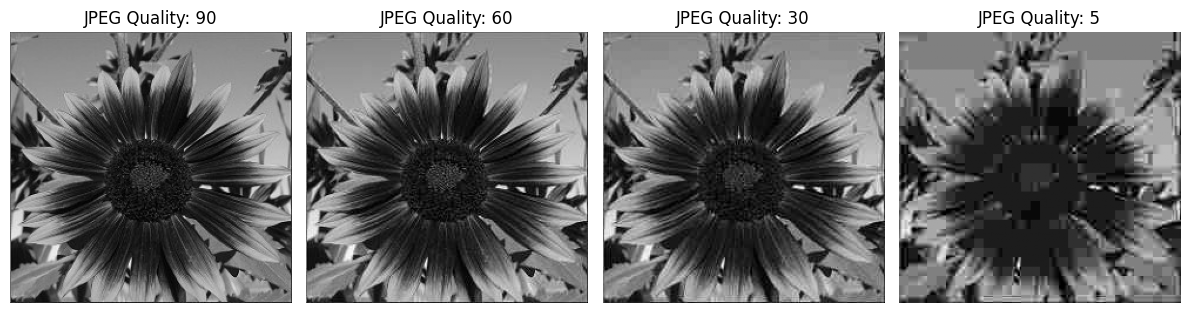

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


compression_levels = [90, 60, 30, 5]
compressed_images = []
histograms = []


for quality in compression_levels:
    # Сжатие JPEG с заданным качеством
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    result, encimg = cv2.imencode('.jpg', img_gray, encode_param)

    # Декодирование
    compressed_image = cv2.imdecode(encimg, cv2.IMREAD_GRAYSCALE)
    compressed_images.append(compressed_image)


    hist = compute_hist(compressed_image)
    histograms.append(hist)


plt.figure(figsize=(12, 8))

for i, quality in enumerate(compression_levels):

  plt.subplot(2, 4, i + 1)
  plt.imshow(compressed_images[i], cmap='gray')
  plt.title(f'JPEG Quality: {quality}')
  plt.axis('off')


plt.tight_layout()
plt.show()


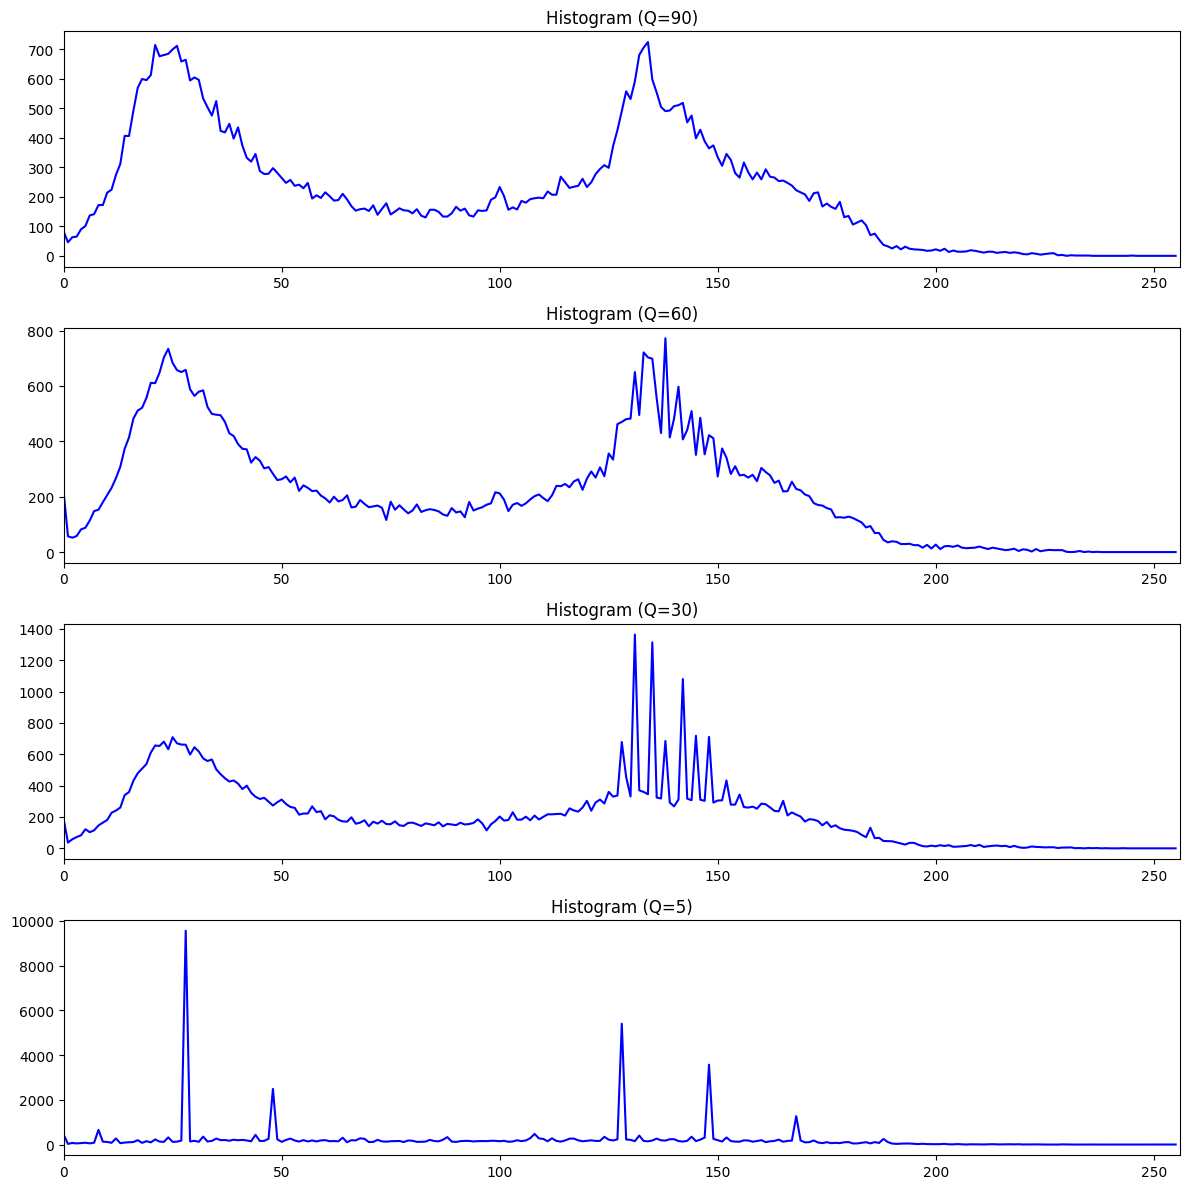

In [44]:
# Показываем гистограммы для каждого уровня сжатия
plt.figure(figsize=(12, 12))
for i, quality in enumerate(compression_levels):

  plt.subplot(4, 1, i+1)
  plt.plot(histograms[i], color='blue')
  plt.title(f'Histogram (Q={quality})')
  plt.xlim([0, 256])

plt.tight_layout()
plt.show()


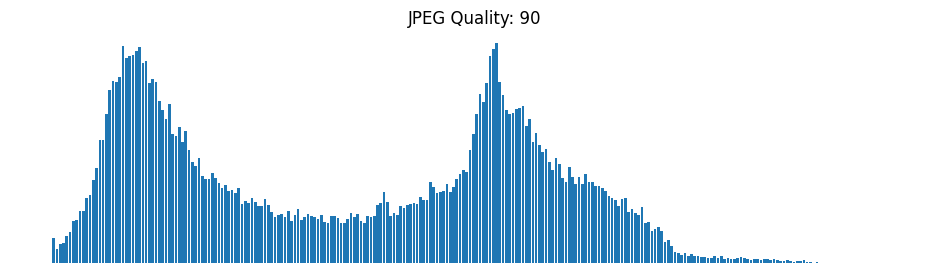

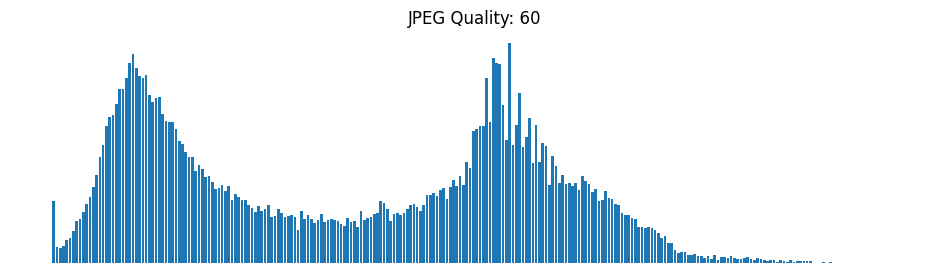

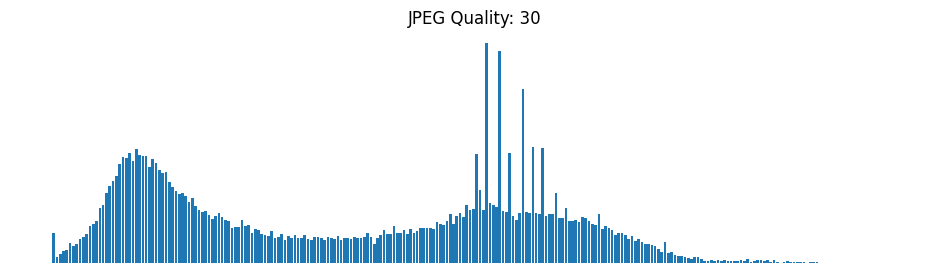

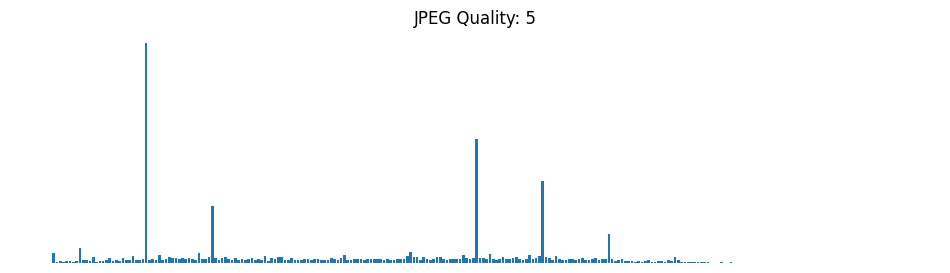

In [45]:
for i, quality in enumerate(compression_levels):

  visualize_hist(histograms[i])
  plt.title(f'JPEG Quality: {quality}')
  plt.axis('off')

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

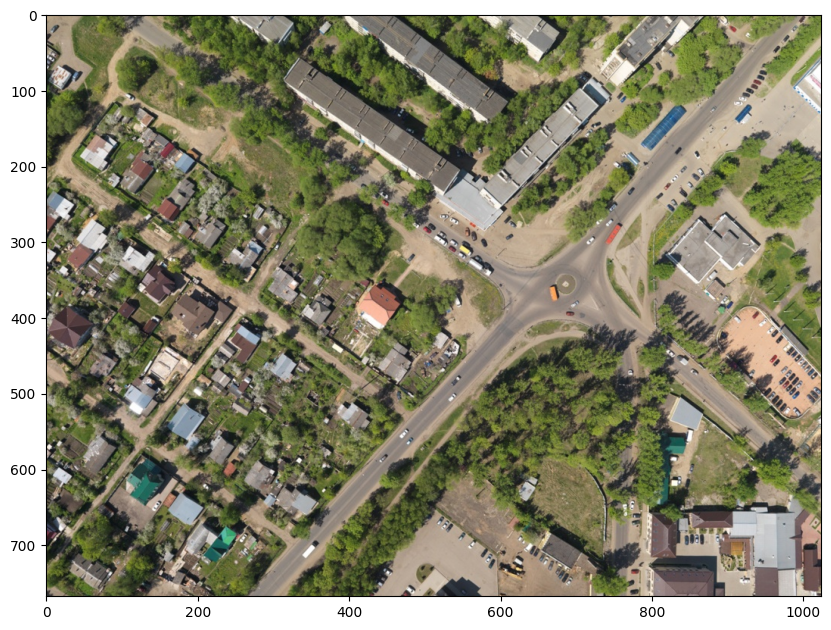

In [46]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

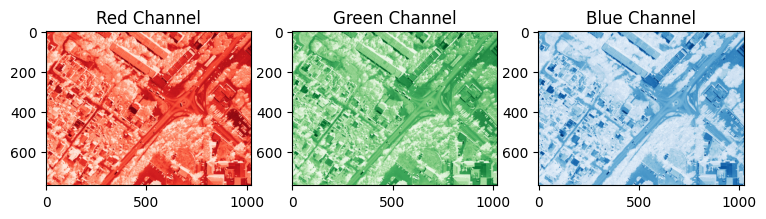

In [47]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(aerial_image[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(aerial_image[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(aerial_image[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

<Figure size 900x300 with 0 Axes>

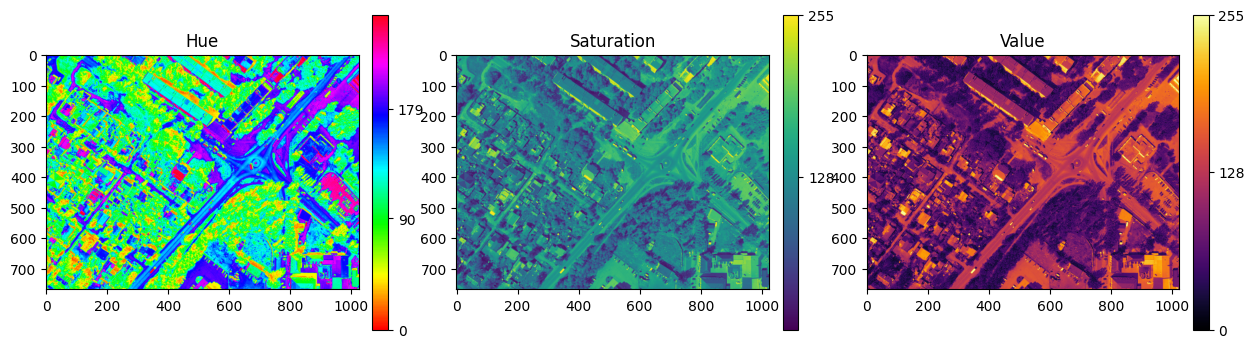

In [48]:
h, s, v = cv2.split(aerial_image)

plt.figure(figsize=[9, 3])
fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

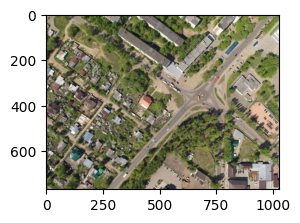

In [49]:
plt.figure(figsize=[3, 3])
plt.imshow(aerial_image);

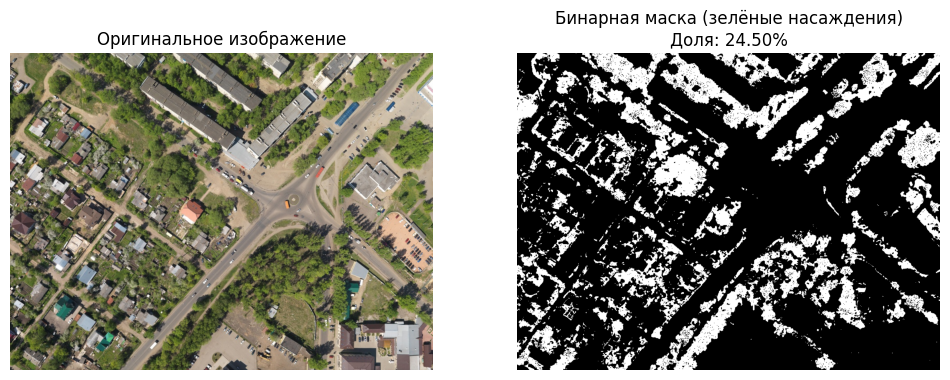

In [50]:

aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_image)


lower_green = np.array([35, 60, 0])
upper_green = np.array([85, 170, 170])


green_mask = cv2.inRange(hsv_image, lower_green, upper_green)


green_percentage = np.sum(green_mask > 0) / green_mask.size * 100


fig, axs = plt.subplots(1, 2, figsize=[12, 6])

axs[0].imshow(aerial_image)
axs[0].set_title("Оригинальное изображение")
axs[0].axis("off")

axs[1].imshow(green_mask, cmap="gray")
axs[1].set_title(f"Бинарная маска (зелёные насаждения)\nДоля: {green_percentage:.2f}%")
axs[1].axis("off")

plt.show()

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [65]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img
        self.height,self.width = self.img.shape

        self.table = [[0 for _ in range(self.width)] for _ in range(self.height)]

        for y in range(self.height):
            for x in range(self.width):
                self.table[y][x] = self.img[y][x] + self.get(x - 1, y) + self.get(x, y - 1) - self.get(x - 1, y - 1)

    def get(self, x, y):
        ''' Returns value of cell at x, y
        x (int): x position of cell
        y (int): y position of cell

        All rows/columns are zero-indexed from top-left
        If requested cell is out of range 0 will be returned

        Returns int
        '''
        if x < 0 or y < 0 or x >= len(self.table[0]) or y >= len(self.table):
            return 0
        else:
            return self.table[y][x]

    def sum(self, x, y, w, h):
        ''' Sums a box at x, y with width w and height h
        x (int): x position of cell
        y (int): y position of cell
        w (int): width of box to sum
        h (int): height of box to sum

        Returns int
        '''
        y += h - 1
        x += w - 1
        return self.get(x, y) - self.get(x, y - h) - self.get(x - w, y) + self.get(x - w, y - h)


In [66]:
I = IntegralImage(img_gray)

In [67]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**
Вычисление центра масс за O(1) с помощью интегральных изображений
https://www.pvsm.ru/fizika/350562

распознование лиц алгоритмом виола джонса
https://habr.com/ru/articles/133826/

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**
Динамическое